PWC Stock price sentiment analysis using Twitter API
----------

Sentiment in the social media (facebook, twitter, instagram, linkedin etc.) plays a big role in managing the perception of an organisation. This sentiment can have an impact in the stock price of listed companies. Is there a statistically significant correlation (or even a lagged correlation) between the social media sentiment and the stock price. This will give the corporate communications department a very important tool to monitor the leading indicator (social media sentiment) in order to estimate the lagging indicator (stock price)

In [114]:
# Imports
import re
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
import sys
import pandas as pd
from dateutil import parser

In [42]:
# Twitter Client Class    
class TwitterClient(object):
    
    def __init__(self):
        # keys and tokens from the Twitter Dev Console
        consumer_key = 'Ve8tKh7aP2CtGhFUtV26W7Zr8'
        consumer_secret = 'P7L9hsifW5cRT4Yg9eJHzDtmi1RZ42ENSWwcKLp7SkegoG4TYT'
        access_token = '2918675084-KoiDatN9UJnvOKJxv4E2eFXmbh94GTiydawSf9w'
        access_token_secret = 'xpcA5NEFyGZ6WQZ5leXpBqHJDS8DlBBseQGqJpJQJU6Y9'
 
        # attempt authentication
        try:
            # create OAuthHandler object
            self.auth = OAuthHandler(consumer_key, consumer_secret)
            # set access token and secret
            self.auth.set_access_token(access_token, access_token_secret)
            # create tweepy API object to fetch tweets
            self.api = tweepy.API(self.auth)
        except:
            print("Error: Authentication Failed")
 
    def clean_tweet(self, tweet):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
 
    def get_tweet_sentiment(self, tweet):
        # create TextBlob object of passed tweet text
        analysis = TextBlob(self.clean_tweet(tweet))
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'
 
    def get_tweets(self, query, count = 10):
        '''
        Main function to fetch tweets and parse them.
        '''
        # empty list to store parsed tweets
        tweets = []
 
        try:
            # call twitter api to fetch tweets
            fetched_tweets = self.api.search(q = query, count = count)
 
            # parsing tweets one by one
            for tweet in fetched_tweets:
                # empty dictionary to store required params of a tweet
                parsed_tweet = {}
 
                # saving text of tweet
                parsed_tweet['text'] = tweet.text
                # saving sentiment of tweet
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text)
                # saving time of tweet
                parsed_tweet['created_at'] = tweet.created_at
 
                # appending parsed tweet to tweets list
                if tweet.retweet_count > 0:
                    # if tweet has retweets, ensure that it is appended only once
                    if parsed_tweet not in tweets:
                        tweets.append(parsed_tweet)
                else:
                    tweets.append(parsed_tweet)
 
            # return parsed tweets
            return tweets
 
        except tweepy.TweepError as e:
            # print error (if any)
            print("Error : " + str(e))

In [62]:
# creating object of TwitterClient Class
api = TwitterClient()
# calling function to get tweets
query = input('Enter the stock name listed in BSE or NSE : ')
epoch = int(input('Enter the number of tweets to be taken : '))
tweets = api.get_tweets(query = query, count = epoch)

# picking positive tweets from tweets
ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
# percentage of positive tweets
print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))

# picking neutral tweets from tweets
netweets = [tweet for tweet in tweets if tweet['sentiment'] == 'neutral']
# percentage of neutral tweets
print("Neutral tweets percentage: {} %".format(100*len(netweets)/len(tweets))) 

# picking negative tweets from tweets
ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
# percentage of negative tweets
print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))

# printing first 5 positive tweets
print("\n\nPositive tweets :")
for tweet in ptweets[:10]:
    print(tweet['text'])
    
# printing first 5 neutral tweets
print("\n\nNeutral tweets :")
for tweet in netweets[:10]:
    print(tweet['text'])
    
# printing first 5 negative tweets
print("\n\nNegative tweets :")
for tweet in ntweets[:10]:
    print(tweet['text'])

tweets_df = pd.DataFrame(tweets)
ptweets_df = pd.DataFrame(ptweets)
ntweets_df = pd.DataFrame(ntweets)
netweets_df = pd.DataFrame(netweets)

Enter the stock name listed in BSE or NSE : Rain Industries
Enter the number of tweets to be taken : 200
Positive tweets percentage: 55.0 %
Neutral tweets percentage: 42.0 %
Negative tweets percentage: 3.0 %


Positive tweets :
@JAugastine Your suggestions rain industries and graphite india really helped. Thanks. Keep sharing valuable inputs.
Another good article on #RainInd 
https://t.co/Pa2Tq2u6mp
Track Aluminum prices here https://t.co/J5yvM8Laww
RT @Arvind2k: Rain Industries: Good results confirm strong tailwinds for carbon products in metal industry.
currently trading at a multiple…
Rain Industries: Good results confirm strong tailwinds for carbon products in metal industry.
currently trading at… https://t.co/CSdo57SXYB
Strong numbers by Rain Industries
@porinju Would anyone share their thoughts on Rain Industries. Worth getting in now for a 3 year view?? 
I am quite… https://t.co/9OSHOc74Wk
RT @GoldieTuteja: Rain Industries has changed the life of many. Even at 340 it offers trem

In [30]:
# Plotting the index using matplotlib
def stockchart(symbol):
    key = 'PD3O8KG4280HX51V'
    ts = TimeSeries(key=key, output_format='pandas')
    data, meta_data = ts.get_intraday(symbol=symbol,interval='60min', outputsize='full')
    data['close'].plot()
    plt.title('Stock chart')
    plt.show()
    return data

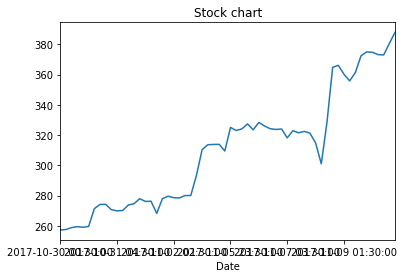

In [123]:
symbol = "Rain"
stock_data = stockchart(symbol)

In [63]:
ptweets_df.head()

,created_at,sentiment,text
0,2017-11-10 18:03:10,positive,@JAugastine Your suggestions rain industries a...
1,2017-11-10 17:17:48,positive,Another good article on #RainInd \nhttps://t.c...
2,2017-11-10 16:58:16,positive,RT @Arvind2k: Rain Industries: Good results co...
3,2017-11-10 16:53:25,positive,Rain Industries: Good results confirm strong t...
4,2017-11-10 16:27:02,positive,Strong numbers by Rain Industries


In [64]:
tweets_df.head()

,created_at,sentiment,text
0,2017-11-11 09:52:09,neutral,RT @contrarianEPS: I tried studying Rain indus...
1,2017-11-11 08:09:10,neutral,I tried studying Rain industries several times...
2,2017-11-11 07:29:19,neutral,I added a video to a @YouTube playlist https:/...
3,2017-11-11 07:11:52,neutral,@SirNumber7 Rain industries bhi 4x ho gya.....
4,2017-11-11 04:29:04,negative,Good Decision this year: Holding Rain Industri...


In [65]:
ntweets_df.head()

,created_at,sentiment,text
0,2017-11-11 04:29:04,negative,Good Decision this year: Holding Rain Industri...
1,2017-11-09 11:14:12,negative,Rain industries continue to rain gold...\nStil...
2,2017-11-09 04:06:24,negative,@rahulkanwal @AamAadmiParty @drharshvardhan Ar...


In [67]:
netweets_df.head()

,created_at,sentiment,text
0,2017-11-11 09:52:09,neutral,RT @contrarianEPS: I tried studying Rain indus...
1,2017-11-11 08:09:10,neutral,I tried studying Rain industries several times...
2,2017-11-11 07:29:19,neutral,I added a video to a @YouTube playlist https:/...
3,2017-11-11 07:11:52,neutral,@SirNumber7 Rain industries bhi 4x ho gya.....
4,2017-11-11 02:17:21,neutral,RT @Carrie_Rachel: We can insist on change in ...


In [75]:
stock_data.head()

,open,high,low,close,volume
Date,,,,,
2017-10-30 00:30:00,247.30,258.35,245.00,257.25,1097520.0
2017-10-30 01:30:00,257.35,264.80,257.15,257.50,1425286.0
2017-10-30 02:30:00,257.50,261.35,257.00,258.80,493604.0
2017-10-30 03:30:00,258.65,260.45,257.55,259.40,260982.0
2017-10-30 04:30:00,259.40,259.50,257.00,259.00,226890.0


In [141]:
stock_date = []
for index, row in stock_data.iterrows():
    stock_date.append(parser.parse(index).now().date())
se = pd.Series(stock_date)
stock_data['Date'] = se.values

In [142]:
stock_data.head()

,open,high,low,close,volume,Date,new_date
Date,,,,,,,
2017-10-30 00:30:00,247.30,258.35,245.00,257.25,1097520.0,2017-11-11,2017-11-11
2017-10-30 01:30:00,257.35,264.80,257.15,257.50,1425286.0,2017-11-11,2017-11-11
2017-10-30 02:30:00,257.50,261.35,257.00,258.80,493604.0,2017-11-11,2017-11-11
2017-10-30 03:30:00,258.65,260.45,257.55,259.40,260982.0,2017-11-11,2017-11-11
2017-10-30 04:30:00,259.40,259.50,257.00,259.00,226890.0,2017-11-11,2017-11-11


'[datetime.date(2017, 11, 11), datetime.date(2017, 11, 11), datetime.date(2017, 11, 11), datetime.date(2017, 11, 11), datetime.date(2017, 11, 11), datetime.date(2017, 11, 11), datetime.date(2017, 11, 11), datetime.date(2017, 11, 11), datetime.date(2017, 11, 11), datetime.date(2017, 11, 11), datetime.date(2017, 11, 11), datetime.date(2017, 11, 11), datetime.date(2017, 11, 11), datetime.date(2017, 11, 11), datetime.date(2017, 11, 11), datetime.date(2017, 11, 11), datetime.date(2017, 11, 11), datetime.date(2017, 11, 11), datetime.date(2017, 11, 11), datetime.date(2017, 11, 11), datetime.date(2017, 11, 11), datetime.date(2017, 11, 11), datetime.date(2017, 11, 11), datetime.date(2017, 11, 11), datetime.date(2017, 11, 11), datetime.date(2017, 11, 11), datetime.date(2017, 11, 11), datetime.date(2017, 11, 11), datetime.date(2017, 11, 11), datetime.date(2017, 11, 11), datetime.date(2017, 11, 11), datetime.date(2017, 11, 11), datetime.date(2017, 11, 11), datetime.date(2017, 11, 11), datetime.dat